# Exercise 3

**Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona**

- For the arriving airport, you can use the Destination column in the searches file. 
- Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.
- **Bonus point**: Solving this problem using pandas (instead of any other approach)

## Modules and libraries

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
#pd.options.display.max_rows = 100

### Path for read the file

In [2]:
folder_path= "C:/Users/Pablo Villar/Desktop/CURSOS/KSchool/Máster en Data Science/8. Data Science Challenge/"
filename= "searches.csv.bz2"

### First: Basic exploration 

We start by reading a few columns to check the columns and their formats.

In [3]:
searches_sample = pd.read_csv(folder_path+filename, 
                              sep='^',
                              nrows=1e5)
searches_sample.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [4]:
searches_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date               100000 non-null  object
 1   Time               100000 non-null  object
 2   TxnCode            100000 non-null  object
 3   OfficeID           100000 non-null  object
 4   Country            99985 non-null   object
 5   Origin             100000 non-null  object
 6   Destination        100000 non-null  object
 7   RoundTrip          100000 non-null  int64 
 8   NbSegments         100000 non-null  int64 
 9   Seg1Departure      100000 non-null  object
 10  Seg1Arrival        100000 non-null  object
 11  Seg1Date           99605 non-null   object
 12  Seg1Carrier        37841 non-null   object
 13  Seg1BookingCode    10777 non-null   object
 14  Seg2Departure      72141 non-null   object
 15  Seg2Arrival        72141 non-null   object
 16  Seg2Date           71

In [5]:
searches_sample.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

The columns that we will need are **'Destination'** and **'Date'**

Let's see more info about this data

In [6]:
searches_sample['Destination'].unique

<bound method Series.unique of 0        AUH
1        MIL
2        SFO
3        ARN
4        MAD
        ... 
99995    TRV
99996    AUA
99997    KUL
99998    SEA
99999    HAM
Name: Destination, Length: 100000, dtype: object>

Any empty values?

In [7]:
searches_sample['Date'].isna().sum()

0

In [8]:
searches_sample['Destination'].isna().sum()

0

In [9]:
for i in searches_sample['Destination'].unique():
    if len(i) >=3:
        print( i, " ", len(i))
    elif len(i) <3:
        print("The data is smaller than 3 codes ",i, len(i))
    else:
        pass

AUH   3
MIL   3
SFO   3
ARN   3
MAD   3
BLR   3
PAR   3
DUB   3
ACE   3
BGW   3
BUD   3
POA   3
MXP   3
LON   3
SNN   3
SLZ   3
PHL   3
GRU   3
IKT   3
HKG   3
SEA   3
STN   3
FUE   3
IST   3
VIE   3
SAO   3
BRI   3
JED   3
CPH   3
DRS   3
DUS   3
VCE   3
NBC   3
USM   3
IAD   3
BKK   3
SIN   3
LKO   3
MUC   3
MNL   3
BBI   3
RSW   3
CMH   3
PLS   3
HAJ   3
NKC   3
HEL   3
AYT   3
FLR   3
LIS   3
BOD   3
IKA   3
TLS   3
MEX   3
MIA   3
LED   3
FRA   3
ATH   3
DXB   3
MRS   3
MSY   3
SVO   3
ONT   3
SJD   3
SOF   3
KHH   3
ORL   3
TFN   3
NYC   3
YVR   3
HYD   3
PNQ   3
BLQ   3
MKC   3
DEN   3
SVX   3
REK   3
AGP   3
KUL   3
VRN   3
LGW   3
LAX   3
HEK   3
HNL   3
KTW   3
OAX   3
ORD   3
ATL   3
FCO   3
CRK   3
CUZ   3
YEG   3
GDL   3
LAN   3
BCN   3
MJV   3
JFK   3
NAS   3
ROM   3
YYC   3
OSL   3
BER   3
TUL   3
SSA   3
DEL   3
SYD   3
TYO   3
DME   3
SLC   3
BHZ   3
CGK   3
AMS   3
MDE   3
LPA   3
AKL   3
MJT   3
BIS   3
BJA   3
HKT   3
SRG   3
GOI   3
CMB   3
QRO   3
BOM   3
EWR   3


### Date column

How to extract Year, month and day


In [10]:
searches_sample['Date'].info()  # We can see the type of data here

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Date
Non-Null Count   Dtype 
--------------   ----- 
100000 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


We can see it's an object and with the function `dt` we cannot extract the year, month and day

because Can only use .dt accessor with datetimelike values

**TIP**

Extract the date from datetime needs a lot of recurses from our computer

If we have the full date we can do a slice and extract the Year, Month and Day

In [11]:
searches_sample['Date'].dt.year.value_counts()

AttributeError: Can only use .dt accessor with datetimelike values

In [12]:
searches_sample['Year_Month'] = searches_sample['Date'].str[:7]
searches_sample['Year_Month']

0        2013-01
1        2013-01
2        2013-01
3        2013-01
4        2013-01
          ...   
99995    2013-04
99996    2013-04
99997    2013-04
99998    2013-04
99999    2013-04
Name: Year_Month, Length: 100000, dtype: object

In [13]:
searches_sample['Month'] = searches_sample['Date'].str[5:7]
searches_sample['Month']

0        01
1        01
2        01
3        01
4        01
         ..
99995    04
99996    04
99997    04
99998    04
99999    04
Name: Month, Length: 100000, dtype: object

### The citys that we want to plot the monthly number of searches are:

|City|IATA Code|
|:----:|:----:|
|Málaga|AGP|
|Madrid|MAD|
|Barcelona|BCN|


In [14]:
malaga_searches = searches_sample[searches_sample['Destination'] == 'AGP']
madrid_searches = searches_sample[searches_sample['Destination'] == 'MAD']
barcelona_searches = searches_sample[searches_sample['Destination'] == 'BCN']

In [15]:
malaga_searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,Year_Month,Month
93,2013-01-01,20:15:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,FRA,AGP,1,2,FRA,AGP,2013-10-13,DF,NaN,AGP,FRA,2013-10-20,DF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,2013-01,01
147,2013-01-01,15:35:53,MPT,63d35a15724f95939e6d0dd0ca39be16,DE,HHN,AGP,0,1,HHN,AGP,2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BRE,2013-01,01
242,2013-01-01,18:47:50,MPT,22cf15984f4b13ed8f513a42324666d1,FR,GVA,AGP,1,2,GVA,AGP,2013-03-09,NaN,NaN,AGP,GVA,2013-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR,2013-01,01
458,2013-01-01,12:43:44,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,DUS,AGP,0,1,DUS,AGP,2013-08-31,I7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,2013-01,01
674,2013-01-01,19:47:16,MPT,b5eea863a84ba9b21115d5e90bca9157,FI,HEL,AGP,1,2,HEL,AGP,2013-07-07,JJ,NaN,AGP,HEL,2013-07-17,JJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HEL,2013-01,01


In [16]:
madrid_searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,Year_Month,Month
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL,2013-01,01
151,2013-01-01,10:46:21,MPT,50c54b52322080d2c257390f714f91bd,ES,FRA,MAD,0,1,FRA,MAD,2013-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD,2013-01,01
375,2013-01-01,09:24:45,FXA,22cf15984f4b13ed8f513a42324666d1,FR,ORY,MAD,0,3,ORY,MAD,2013-04-02,FI,C,MAD,ALC,2013-04-03,SL,J,ALC,ORN,2013-04-03,KR,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,4e2eadd83a9320fda69759705f818867,PAR,2013-01,01
406,2013-01-01,07:03:29,MPT,22cf15984f4b13ed8f513a42324666d1,FR,PAR,MAD,1,2,PAR,MAD,2013-02-26,NaN,NaN,MAD,PAR,2013-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR,2013-01,01
509,2013-01-01,09:50:42,MPT,440642a9bdaeb6287f826cefd73255e8,US,TLV,MAD,1,2,TLV,MAD,2013-01-04,VI,NaN,MAD,TLV,2013-01-08,VI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN,2013-01,01


In [17]:
barcelona_searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,Year_Month,Month
113,2013-01-01,23:40:53,FXX,0028c46214bc260eb3011510a898cd42,ES,ALC,BCN,0,2,ALC,BCN,2013-02-08,SL,Y,BCN,LPA,2013-02-08,SL,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,f024768c26f020e6243423f932c2a4de,MAD,2013-01,01
165,2013-01-01,03:40:25,MPT,f4b923424d840c9128df27b5242feffa,US,SFO,BCN,1,2,SFO,BCN,2013-03-20,NaN,NaN,BCN,SFO,2013-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,2013-01,01
177,2013-01-01,11:26:34,MPT,3ac5426dd4f6bb8de28349c7b77e1ee4,IT,MOW,BCN,1,2,MOW,BCN,2013-01-16,NaN,NaN,BCN,MOW,2013-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MIL,2013-01,01
186,2013-01-01,09:46:07,MPT,61880d6e0141d7ec9659ef77e29aab01,DK,CPH,BCN,1,2,CPH,BCN,2013-05-09,NaN,NaN,BCN,CPH,2013-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CPH,2013-01,01
188,2013-01-01,02:07:17,CAL,b9c9a14cb66d19de74865613593d2e95,MA,NDR,BCN,1,2,NDR,BCN,2013-01-18,KE,NaN,BCN,NDR,2013-02-01,KE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CAS,2013-01,01


Now we will group this data

In [18]:
data = searches_sample[['Date', 'Destination']]     # Define the data we will agroup

data['searches'] = 1                                # Create a new column to define every row equals to 1 search

data.groupby(['Date', 'Destination']).sum()         # We group the date and destination with the values of searches

C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\415050191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['searches'] = 1                                # Create a new column to define every row equals to 1 search


searches
Date       Destination          
2013-01-01 ABT                 1
           ABX                 1
           ACC                 1
           ACE                 3
           ADB                 1
...                          ...
2013-04-10 ZAG                 2
           ZFQ                 1
           ZIH                 1
           ZRH                 7
           ZTH                 1

[37967 rows x 1 columns]

It's better if we filter the data when we are reading the file

Using `usecols` we only get the columns that we want and even than use `groupby` or `pivot_table` We can use a filter in the data like:
````bash
data = searches_sample[searches_sample['Destination'].isin(["MAD", "BCN", "AGP"])]
````
This line of code give us the airports with that IATA_code that we want to plot

In [19]:
searches = pd.read_csv(folder_path+filename,
                       sep='^',
                       compression='bz2',
                       nrows= 2e5,
                       usecols=['Date', 'Destination'])                 # We can use lambda to extract the Year and month and iata_codes

data = searches[searches['Destination'].isin(["MAD", "BCN", "AGP"])]

data.head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


In [20]:
searches = pd.read_csv(folder_path+filename,
                       sep='^',
                       compression='bz2',
                       nrows= 2e5,
                       usecols=['Date', 'Destination'],
                       converters={
                           'Date': lambda x: x[:7],
                           'Destination': lambda x: x if x in ['MAD', 'BCN', 'AGP'] else None
                       })                 


data.head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


# OJO
Si utilizamos el lambda cuando queramos leer todos los datos esto consumirá mucha memoria y procesado

Lo mejor es meterlo en un bucle for para cada chunk

In [21]:
data['Year_Month'] = data['Date'].str[:7]   # Extract the year and month slicing
data.head()

,Date,Destination,Year_Month
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


In [22]:
data['searches'] = 1        # Create a new column to count values

In [23]:
data = data[['Year_Month', 'Destination', 'searches']]
data_plot = data.groupby(['Year_Month','Destination']).sum().reset_index()
data_plot

,Year_Month,Destination,searches
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497
5,2013-02,MAD,400
6,2013-03,AGP,187
7,2013-03,BCN,536
8,2013-03,MAD,433
9,2013-04,AGP,145


Let's plot this example:

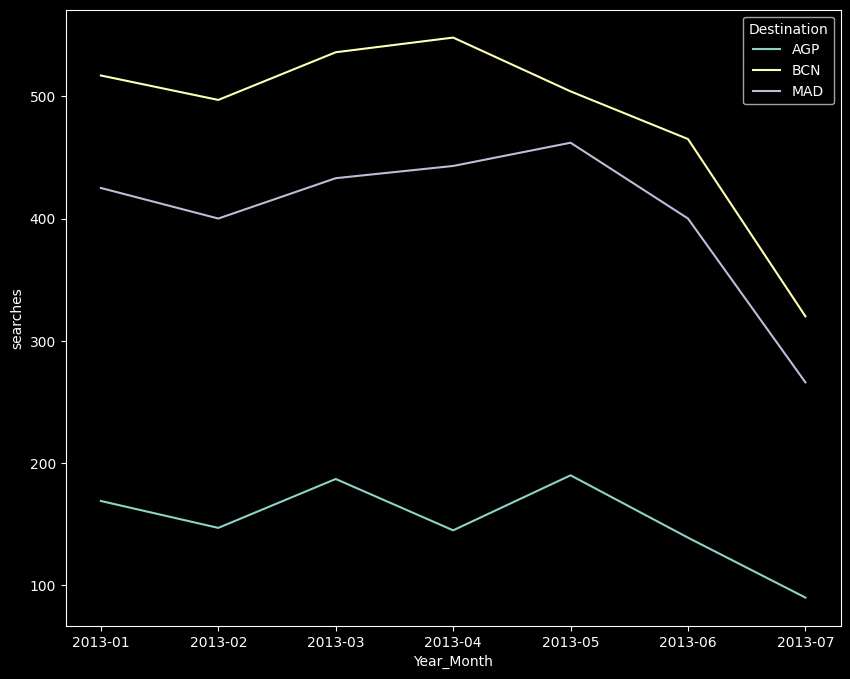

In [24]:
fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(data=data_plot, x='Year_Month', y='searches', hue='Destination');

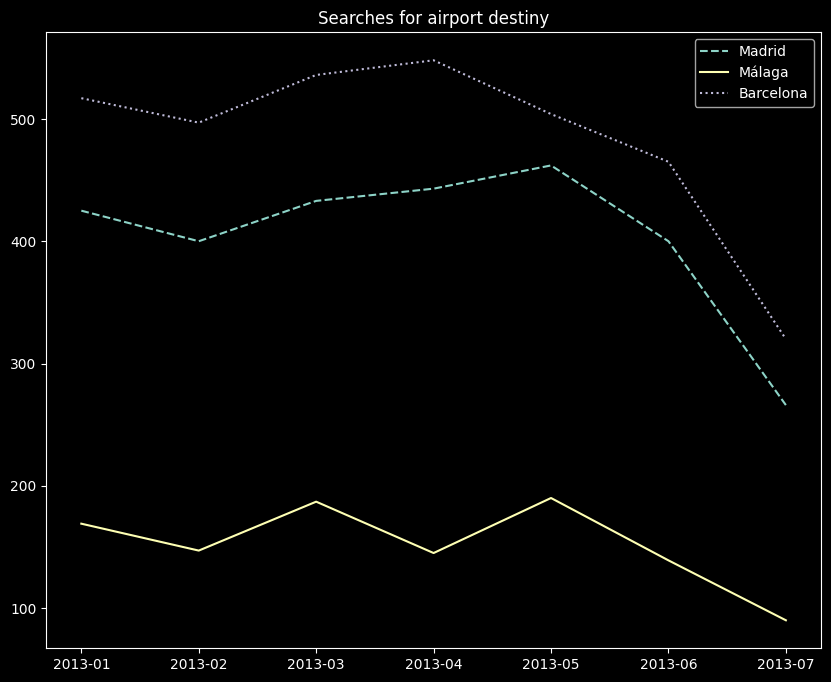

In [25]:
data_madrid =data_plot[data_plot['Destination'].isin(['MAD'])]
data_malaga =data_plot[data_plot['Destination'].isin(['AGP'])]
data_barcelona =data_plot[data_plot['Destination'].isin(['BCN'])]

fig, ax = plt.subplots(figsize=(10,8))

ax.plot('Year_Month', 'searches',data= data_madrid, ls='--', label="Madrid" )
ax.plot('Year_Month', 'searches',data= data_malaga, ls='-', label='Málaga' )
ax.plot('Year_Month', 'searches',data= data_barcelona, ls=':', label='Barcelona' )

plt.title('Searches for airport destiny')
plt.legend();

# Let's do it with all the data

But with chunks... don't go crazy 🫡

In [26]:
searches_iterator = pd.read_csv(folder_path+filename,
                       sep='^',
                       chunksize=1e5,
                       nrows=1e6,
                       compression='bz2',
                       usecols=['Date','Destination'])

searches =[]
 
for i, chunk in enumerate(searches_iterator):
    print(("Chunk: %d, size of chunk %d"%(i+1, len(chunk))))           # Only for have some information about the chunks
    chunk['Year_Month'] = chunk['Date'].str[:7]                        # Extract the year and month slicing the chunks
    data_chunk = chunk[chunk['Destination'].isin(["MAD", "BCN", "AGP"])]    # Filter the destination airports we want to plot
    data_chunk['Searches'] = 1
    chunk_group = data_chunk.groupby(['Year_Month','Destination']).sum()[['Searches']]  # Group the data_chunk and sum the column that we create before
    searches.append(chunk_group)
    print(searches)
    
    

Chunk: 1, size of chunk 100000
[                        Searches
Year_Month Destination          
2013-01    AGP               169
           BCN               517
           MAD               425
2013-02    AGP               147
           BCN               497
           MAD               400
2013-03    AGP               187
           BCN               536
           MAD               433
2013-04    AGP                31
           BCN               174
           MAD               147]


C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chunk['Searches'] = 1
C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chunk_group = data_chunk.groupby(['Year_Month','Destination']).sum()[['Searches']]  # Group the data_chunk and sum the column that we create before


Chunk: 2, size of chunk 100000
[                        Searches
Year_Month Destination          
2013-01    AGP               169
           BCN               517
           MAD               425
2013-02    AGP               147
           BCN               497
           MAD               400
2013-03    AGP               187
           BCN               536
           MAD               433
2013-04    AGP                31
           BCN               174
           MAD               147,                         Searches
Year_Month Destination          
2013-04    AGP               114
           BCN               374
           MAD               296
2013-05    AGP               190
           BCN               504
           MAD               462
2013-06    AGP               139
           BCN               465
           MAD               400
2013-07    AGP                90
           BCN               320
           MAD               266]


C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chunk['Searches'] = 1
C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chunk_group = data_chunk.groupby(['Year_Month','Destination']).sum()[['Searches']]  # Group the data_chunk and sum the column that we create before


Chunk: 3, size of chunk 100000
[                        Searches
Year_Month Destination          
2013-01    AGP               169
           BCN               517
           MAD               425
2013-02    AGP               147
           BCN               497
           MAD               400
2013-03    AGP               187
           BCN               536
           MAD               433
2013-04    AGP                31
           BCN               174
           MAD               147,                         Searches
Year_Month Destination          
2013-04    AGP               114
           BCN               374
           MAD               296
2013-05    AGP               190
           BCN               504
           MAD               462
2013-06    AGP               139
           BCN               465
           MAD               400
2013-07    AGP                90
           BCN               320
           MAD               266,                         Searches
Year_Mont

C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chunk['Searches'] = 1
C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chunk_group = data_chunk.groupby(['Year_Month','Destination']).sum()[['Searches']]  # Group the data_chunk and sum the column that we create before


Chunk: 4, size of chunk 100000
[                        Searches
Year_Month Destination          
2013-01    AGP               169
           BCN               517
           MAD               425
2013-02    AGP               147
           BCN               497
           MAD               400
2013-03    AGP               187
           BCN               536
           MAD               433
2013-04    AGP                31
           BCN               174
           MAD               147,                         Searches
Year_Month Destination          
2013-04    AGP               114
           BCN               374
           MAD               296
2013-05    AGP               190
           BCN               504
           MAD               462
2013-06    AGP               139
           BCN               465
           MAD               400
2013-07    AGP                90
           BCN               320
           MAD               266,                         Searches
Year_Mont

C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chunk['Searches'] = 1
C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chunk_group = data_chunk.groupby(['Year_Month','Destination']).sum()[['Searches']]  # Group the data_chunk and sum the column that we create before


Chunk: 5, size of chunk 100000
[                        Searches
Year_Month Destination          
2013-01    AGP               169
           BCN               517
           MAD               425
2013-02    AGP               147
           BCN               497
           MAD               400
2013-03    AGP               187
           BCN               536
           MAD               433
2013-04    AGP                31
           BCN               174
           MAD               147,                         Searches
Year_Month Destination          
2013-04    AGP               114
           BCN               374
           MAD               296
2013-05    AGP               190
           BCN               504
           MAD               462
2013-06    AGP               139
           BCN               465
           MAD               400
2013-07    AGP                90
           BCN               320
           MAD               266,                         Searches
Year_Mont

C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chunk['Searches'] = 1
C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chunk_group = data_chunk.groupby(['Year_Month','Destination']).sum()[['Searches']]  # Group the data_chunk and sum the column that we create before


Chunk: 6, size of chunk 100000
[                        Searches
Year_Month Destination          
2013-01    AGP               169
           BCN               517
           MAD               425
2013-02    AGP               147
           BCN               497
           MAD               400
2013-03    AGP               187
           BCN               536
           MAD               433
2013-04    AGP                31
           BCN               174
           MAD               147,                         Searches
Year_Month Destination          
2013-04    AGP               114
           BCN               374
           MAD               296
2013-05    AGP               190
           BCN               504
           MAD               462
2013-06    AGP               139
           BCN               465
           MAD               400
2013-07    AGP                90
           BCN               320
           MAD               266,                         Searches
Year_Mont

C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chunk['Searches'] = 1
C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chunk_group = data_chunk.groupby(['Year_Month','Destination']).sum()[['Searches']]  # Group the data_chunk and sum the column that we create before


Chunk: 7, size of chunk 100000
[                        Searches
Year_Month Destination          
2013-01    AGP               169
           BCN               517
           MAD               425
2013-02    AGP               147
           BCN               497
           MAD               400
2013-03    AGP               187
           BCN               536
           MAD               433
2013-04    AGP                31
           BCN               174
           MAD               147,                         Searches
Year_Month Destination          
2013-04    AGP               114
           BCN               374
           MAD               296
2013-05    AGP               190
           BCN               504
           MAD               462
2013-06    AGP               139
           BCN               465
           MAD               400
2013-07    AGP                90
           BCN               320
           MAD               266,                         Searches
Year_Mont

C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chunk['Searches'] = 1
C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chunk_group = data_chunk.groupby(['Year_Month','Destination']).sum()[['Searches']]  # Group the data_chunk and sum the column that we create before


Chunk: 8, size of chunk 100000
[                        Searches
Year_Month Destination          
2013-01    AGP               169
           BCN               517
           MAD               425
2013-02    AGP               147
           BCN               497
           MAD               400
2013-03    AGP               187
           BCN               536
           MAD               433
2013-04    AGP                31
           BCN               174
           MAD               147,                         Searches
Year_Month Destination          
2013-04    AGP               114
           BCN               374
           MAD               296
2013-05    AGP               190
           BCN               504
           MAD               462
2013-06    AGP               139
           BCN               465
           MAD               400
2013-07    AGP                90
           BCN               320
           MAD               266,                         Searches
Year_Mont

C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chunk['Searches'] = 1
C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chunk_group = data_chunk.groupby(['Year_Month','Destination']).sum()[['Searches']]  # Group the data_chunk and sum the column that we create before


Chunk: 9, size of chunk 100000
[                        Searches
Year_Month Destination          
2013-01    AGP               169
           BCN               517
           MAD               425
2013-02    AGP               147
           BCN               497
           MAD               400
2013-03    AGP               187
           BCN               536
           MAD               433
2013-04    AGP                31
           BCN               174
           MAD               147,                         Searches
Year_Month Destination          
2013-04    AGP               114
           BCN               374
           MAD               296
2013-05    AGP               190
           BCN               504
           MAD               462
2013-06    AGP               139
           BCN               465
           MAD               400
2013-07    AGP                90
           BCN               320
           MAD               266,                         Searches
Year_Mont

C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chunk['Searches'] = 1
C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chunk_group = data_chunk.groupby(['Year_Month','Destination']).sum()[['Searches']]  # Group the data_chunk and sum the column that we create before


Chunk: 10, size of chunk 100000
[                        Searches
Year_Month Destination          
2013-01    AGP               169
           BCN               517
           MAD               425
2013-02    AGP               147
           BCN               497
           MAD               400
2013-03    AGP               187
           BCN               536
           MAD               433
2013-04    AGP                31
           BCN               174
           MAD               147,                         Searches
Year_Month Destination          
2013-04    AGP               114
           BCN               374
           MAD               296
2013-05    AGP               190
           BCN               504
           MAD               462
2013-06    AGP               139
           BCN               465
           MAD               400
2013-07    AGP                90
           BCN               320
           MAD               266,                         Searches
Year_Mon

C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chunk['Searches'] = 1
C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\3837483233.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chunk_group = data_chunk.groupby(['Year_Month','Destination']).sum()[['Searches']]  # Group the data_chunk and sum the column that we create before


Now we only have to concat the chunks of searches and groupby again

In [27]:
searches_iterator = pd.read_csv(folder_path+filename,
                       sep='^',
                       chunksize=1e6,
                    #    nrows=1e6,
                       compression='bz2',
                       usecols=['Date','Destination'])

searches =[]
 
for i, chunk in enumerate(searches_iterator):
    # print(("Chunk: %d, size of chunk %d"%(i+1, len(chunk))))           # Only for have some information about the chunks
    chunk['Year_Month'] = chunk['Date'].str[:7]                        # Extract the year and month slicing the chunks
    data_chunk = chunk[chunk['Destination'].isin(["MAD", "BCN", "AGP"])]    # Filter the destination airports we want to plot
    data_chunk['Searches'] = 1
    chunk_group = data_chunk.groupby(['Year_Month','Destination']).sum()[['Searches']]  # Group the data_chunk and sum the column that we create before
    searches.append(chunk_group)
    
total_searches = pd.concat(searches)                                    # Concat all the chunks
total_searches = total_searches.groupby(['Year_Month', 'Destination']).sum()[['Searches']]
total_searches

C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\1046759681.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chunk['Searches'] = 1
C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\1046759681.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chunk_group = data_chunk.groupby(['Year_Month','Destination']).sum()[['Searches']]  # Group the data_chunk and sum the column that we create before
C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16572\1046759681.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Searches
Year_Month Destination          
2013-01    AGP              9633
           BCN             29469
           MAD             24258
2013-02    AGP              8379
           BCN             28329
           MAD             22800
2013-03    AGP             10659
           BCN             30552
           MAD             24681
2013-04    AGP              8265
           BCN             31236
           MAD             25251
2013-05    AGP             10830
           BCN             28728
           MAD             26334
2013-06    AGP              7923
           BCN             26505
           MAD             22800
2013-07    AGP              8892
           BCN             29241
           MAD             22971
2013-08    AGP              7866
           BCN             27075
           MAD             21831
2013-09    AGP              8151
           BCN             23427
           MAD             21147
2013-10    AGP              6499
           BCN             20276
           MAD             22294
2013-11    AGP              6384
           BCN             19824
           MAD             20272
2013-12    AGP              3696
           BCN             15400
           MAD             14504

In [41]:
for_matplotlib = total_searches.pivot_table(values='Searches',
                                            columns='Destination',
                                            index='Year_Month',
                                            aggfunc='sum')
for_matplotlib

Destination,AGP,BCN,MAD
Year_Month,,,
2013-01,9633,29469,24258
2013-02,8379,28329,22800
2013-03,10659,30552,24681
2013-04,8265,31236,25251
2013-05,10830,28728,26334
2013-06,7923,26505,22800
2013-07,8892,29241,22971
2013-08,7866,27075,21831
2013-09,8151,23427,21147


<AxesSubplot: xlabel='Year_Month'>

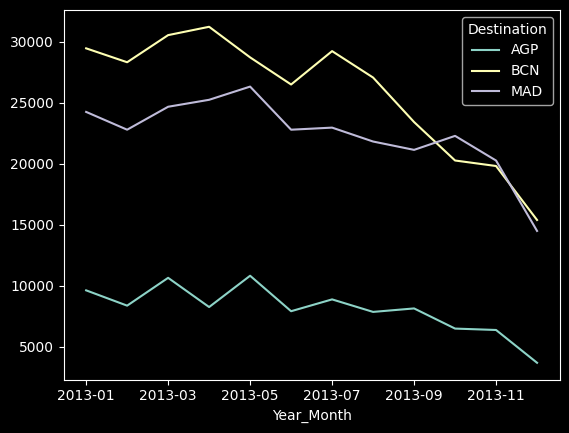

In [44]:
for_matplotlib.plot()

In [46]:
total_searches.head()

Searches
Year_Month Destination          
2013-01    AGP              9633
           BCN             29469
           MAD             24258
2013-02    AGP              8379
           BCN             28329

In [47]:
total_searches.columns

Index(['Searches'], dtype='object')

# Preguntar a DANI como sacar con MATPLOTLIB una vez realizados los chunks

In [ ]:
# with matplotlib we need 3 df for the axes by destination

data_madrid =total_searches[total_searches['Destination'].isin(['MAD'])]        # No funciona por el groupby que solo coge la columna de Searches solo hay que cambiar el nombre de la variable en la función total_searches en pd.concat y al groupby meterlo en una variable con otro nombre
data_malaga =total_searches[total_searches['Destination'].isin(['AGP'])]
data_barcelona =total_searches[total_searches['Destination'].isin(['BCN'])]

fig, ax = plt.subplots(figsize=(10,8))

ax.plot('Year_Month', 'searches',data= data_madrid, ls='--', label="Madrid" )
ax.plot('Year_Month', 'searches',data= data_malaga, ls='-', label='Málaga' )
ax.plot('Year_Month', 'searches',data= data_barcelona, ls=':', label='Barcelona' )

plt.title('Searches for airport destiny')
plt.legend();

KeyError: 'Destination'

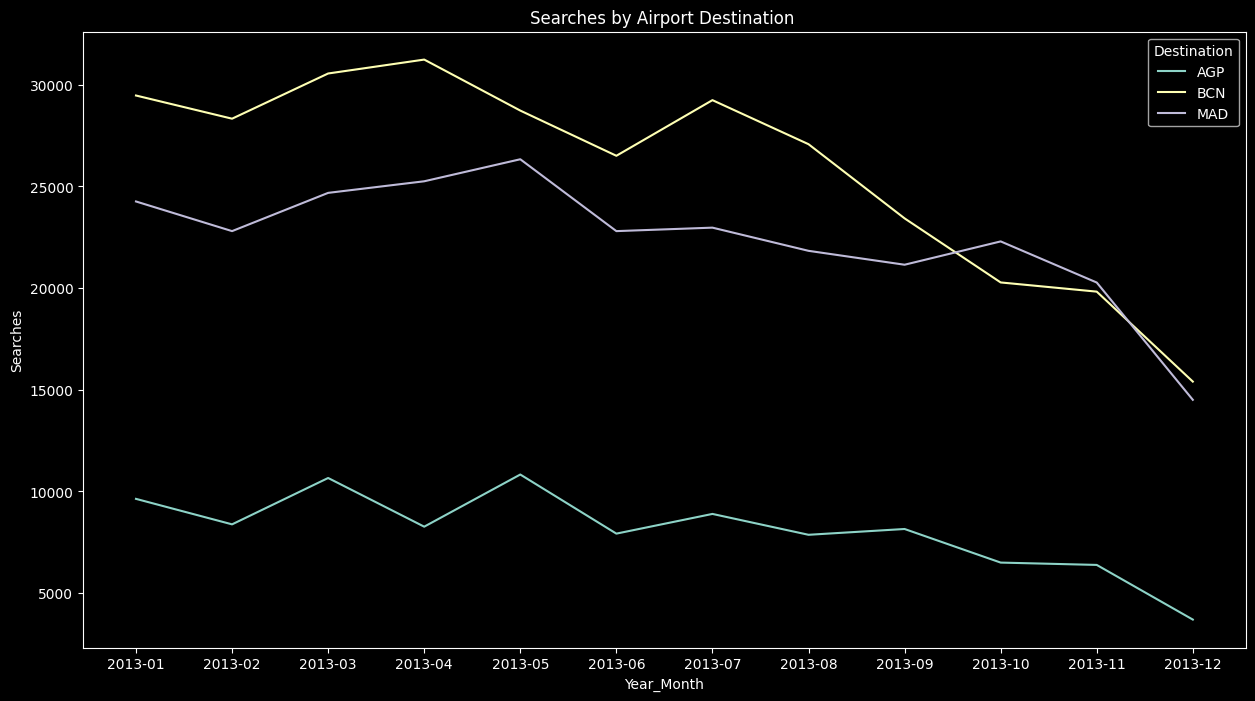

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

sns.lineplot(data=total_searches, x='Year_Month', y='Searches', hue='Destination')
plt.title("Searches by Airport Destination ");

# Let's create a function who do all job for us

In [ ]:
def data_preprocessing(df): 
    '''

    '''

    df['Date'] = df['Date'].str.strip().str[:7]         # Slicing the date
    
    df['Destination'] = df['Destination'].str.strip().str.upper()   # Cleaning the values of Destination (iata_codes must be len=3)
    df.dropna(inplace=True)                                         # Cleaning de Na values

In [ ]:
def data_plot(path: str):
    
    searches_iterator = pd.read_csv(path,
                        sep='^',
                        chunksize=1e6,
                        #    nrows=1e6,
                        compression='bz2',
                        usecols=['Date','Destination'])

    searches =[]
    
    for i, chunk in enumerate(searches_iterator):
        # print(("Chunk: %d, size of chunk %d"%(i+1, len(chunk))))           # Only for have some information about the chunks
        chunk['Year_Month'] = chunk['Date'].str[:7]                        # Extract the year and month slicing the chunks
        data_chunk = chunk[chunk['Destination'].isin(["MAD", "BCN", "AGP"])]    # Filter the destination airports we want to plot
        data_chunk['Searches'] = 1
        chunk_group = data_chunk.groupby(['Year_Month','Destination']).sum()[['Searches']]  # Group the data_chunk and sum the column that we create before
        searches.append(chunk_group)
        
    total_searches = pd.concat(searches)                                    # Concat all the chunks
    total_searches = total_searches.groupby(['Year_Month', 'Destination']).sum()[['Searches']]
    
    fig, ax = plt.subplots(figsize=(15,8))

    plot = sns.lineplot(data=total_searches, x='Year_Month', y='Searches', hue='Destination')
    plt.title("Searches by Airport Destination ");
    return plot

C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16072\3168168681.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chunk['Searches'] = 1
C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16072\3168168681.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chunk_group = data_chunk.groupby(['Year_Month','Destination']).sum()[['Searches']]  # Group the data_chunk and sum the column that we create before
C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16072\3168168681.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

<AxesSubplot: title={'center': 'Searches by Airport Destination '}, xlabel='Year_Month', ylabel='Searches'>

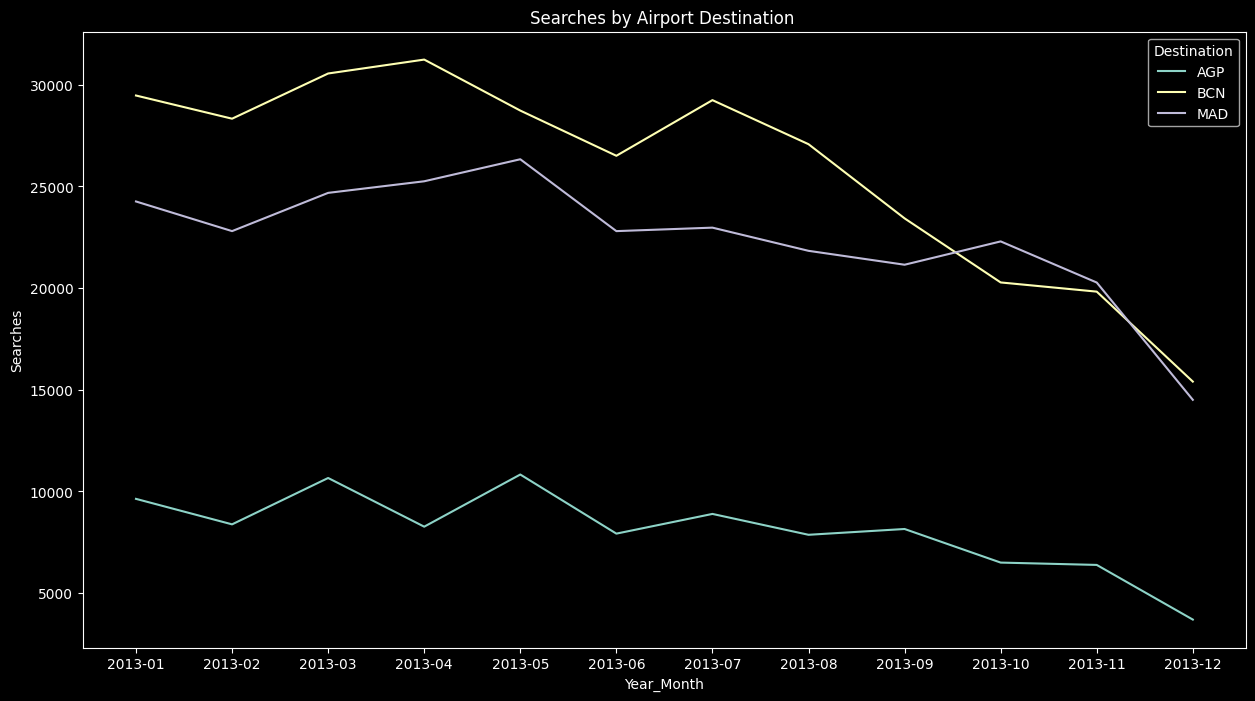

In [ ]:
data_plot(folder_path+filename)

# Espero que os haya ayudado y servido como a mí, intentadlo 😁✌️

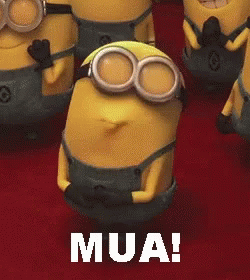
> Dudas, comentarios o sugerencias podéis preguntarme en: pablo.villardelcastillo@gmail.com